In [1]:
import numpy as np

import matplotlib.pyplot as plt
import cv2
from datetime import datetime
from sklearn.utils import check_random_state


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


In [2]:
import os

clear_sky_images = os.listdir("resources/cloud-images/cloud-classifier-1/clear_sky")
cloud_images = os.listdir("resources/cloud-images/cloud-classifier-1/cloud")

labeled_data = {}

# Fine to label the images like this for now because there are only 2 classes, but best to automate this step using folder names next
# [X] See svm examples

for i in clear_sky_images:
    labeled_data[i] =  [{'label': 'clear_sky'}]

for i in cloud_images:
    labeled_data[i] =  [{'label': 'cloud'}]


In [ ]:
train_images = []
train_labels = []
class_object = ['cloud', 'clear_sky']

start_datetime = datetime.now()

for (i, image_file) in enumerate(labeled_data):
    path = 'resources/cloud-images/cloud-classifier-1/'+ labeled_data[image_file][0]['label'] + '/' + image_file
    image = cv2.imread(path)
    plt.imshow(image)
    plt.show()
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    label = class_object.index(labeled_data[image_file][0]['label'])
    tmp_label = labeled_data[image_file][0]['label']
    image = cv2.resize(image, (32, 32))
    train_images.append(image)
    train_labels.append(label)
    print('Loaded...', '\U0001F483', 'Image', str(i+1), 'is a', tmp_label)
    plt.imshow(image)
    plt.show()

end_datetime = datetime.now()

In [4]:
#Splitting the data

print('Image Processing Duration: ' + str(end_datetime-start_datetime))

train_images = np.array(train_images)
train_labels = np.array(train_labels)


random_state = check_random_state(0)
permutation = random_state.permutation(train_images.shape[0])
train_images = train_images[permutation]
train_labels = train_labels[permutation]

train_images = train_images.reshape((train_images.shape[0], -1))

test_size = 0.3

train_samples, test_samples, train_samples_labels, test_labels = train_test_split(
    train_images, train_labels, test_size=test_size, random_state=None)


Image Processing Duration: 0:00:57.140556


In [5]:
# Training

X_train = train_samples
X_test = test_samples

y_train, y_test = train_samples_labels, test_labels

clf = LogisticRegression(C= 1.0, penalty="l1", solver="liblinear", tol=0.1)
clf.fit(X_train, y_train)


sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)

print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

Sparsity with L1 penalty: 0.29%
Test score with L1 penalty: 0.7524


/Users/lucasnseyep/code/LucasNseyep/belle-weder/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/lucasnseyep/code/LucasNseyep/belle-weder/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/lucasnseyep/code/LucasNseyep/belle-weder/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


<Figure size 1000x500 with 0 Axes>

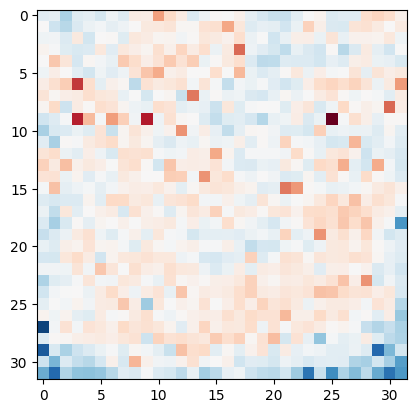

In [6]:
# Plotting the classification vector as an image
coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()

fig, ax = plt.subplots()


plt.imshow(
    coef[0].reshape(32, 32),
    interpolation="nearest",
    cmap=plt.cm.RdBu,
    vmin=-scale,
    vmax=scale,
)

plt.show()

/Users/lucasnseyep/code/LucasNseyep/belle-weder/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/lucasnseyep/code/LucasNseyep/belle-weder/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/lucasnseyep/code/LucasNseyep/belle-weder/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


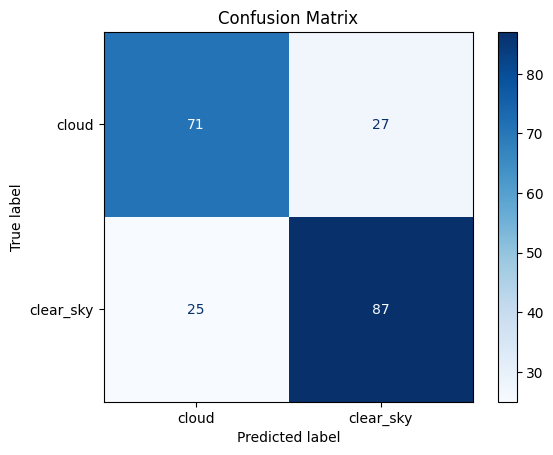

In [7]:
# Confusion Matrix
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_object)
disp.plot(cmap="Blues")
plt.title(f"Confusion Matrix")
plt.grid(False)
plt.show()

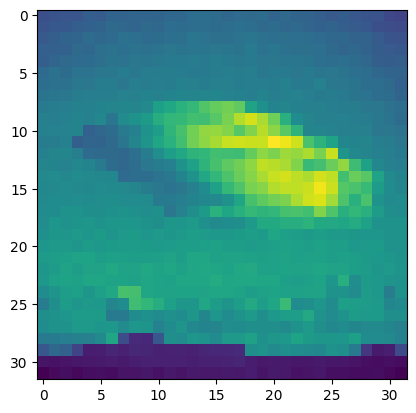

/Users/lucasnseyep/code/LucasNseyep/belle-weder/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/lucasnseyep/code/LucasNseyep/belle-weder/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/lucasnseyep/code/LucasNseyep/belle-weder/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


array([0])

In [8]:
#Test

image = cv2.imread("labs/test_image4.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (32, 32))
plt.imshow(image)
plt.show()

image = np.array(image)
image = image.flatten()

clf.predict([image])
